<a href="https://colab.research.google.com/github/amrrahman1/Recreate-Graph/blob/main/Re_create_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive

In [26]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [28]:
filename = '/content/drive/MyDrive/mortgages.csv'

In [29]:
df = pd.read_csv(filename)

In [34]:
df.head(0)

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate


In [35]:
df['Interest Paid'].isnull().sum()

0

In [ ]:
#1. Create a filter so the Mortgage Name is '30 Year'.  Use the len() to find how many rows correspond to 30 years.
year_filter = df.loc[df['Mortgage Name'] == '30 Year']
len(year_filter)

720

In [ ]:
#2. Create a filter for an interest rate of 3% (notice how it is written in the data!) 
three_percent = df.loc[df['Interest Rate']==0.03]
three_percent

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
895,176,13706.74,2762.33,34.26,2728.07,10978.67,15 Year,0.03
896,177,10978.67,2762.33,27.44,2734.89,8243.78,15 Year,0.03
897,178,8243.78,2762.33,20.60,2741.73,5502.05,15 Year,0.03
898,179,5502.05,2762.33,13.75,2748.58,2753.47,15 Year,0.03


In [64]:
#3. Define a new dataframe based on both the year and the interest filters you have created.  
new_df = df[(df['Mortgage Name'] == '30 Year') & (df['Interest Rate']==0.03)]
new_df

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
355,356,8364.12,1686.42,20.91,1665.51,6698.61,30 Year,0.03
356,357,6698.61,1686.42,16.74,1669.68,5028.93,30 Year,0.03
357,358,5028.93,1686.42,12.57,1673.85,3355.08,30 Year,0.03
358,359,3355.08,1686.42,8.38,1678.04,1677.04,30 Year,0.03


In [65]:
#4. We have a choice for the 5% interest rate.  We can just create another filter where df.['Interest Rate'] == .05 
five_percent = df.loc[df['Interest Rate']== 0.05]
five_percent

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05
...,...,...,...,...,...,...,...,...
1075,176,15619.91,3163.17,65.08,3098.09,12521.82,15 Year,0.05
1076,177,12521.82,3163.17,52.17,3111.00,9410.82,15 Year,0.05
1077,178,9410.82,3163.17,39.21,3123.96,6286.86,15 Year,0.05
1078,179,6286.86,3163.17,26.19,3136.98,3149.88,15 Year,0.05


In [66]:
new_df_five = df[(df['Mortgage Name'] == '30 Year') & (df['Interest Rate']==0.05)]
new_df_five

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05
...,...,...,...,...,...,...,...,...
715,356,10596.54,2147.29,44.15,2103.14,8493.40,30 Year,0.05
716,357,8493.40,2147.29,35.38,2111.91,6381.49,30 Year,0.05
717,358,6381.49,2147.29,26.58,2120.71,4260.78,30 Year,0.05
718,359,4260.78,2147.29,17.75,2129.54,2131.24,30 Year,0.05


In [ ]:
#4.What are the first three values in the output for the cumulative sum of the 3% rate?
#Answer 3%,6% and 9%
three_percent['Interest Rate'].cumsum()

0       0.03
1       0.06
2       0.09
3       0.12
4       0.15
       ...  
895    16.08
896    16.11
897    16.14
898    16.17
899    16.20
Name: Interest Rate, Length: 540, dtype: float64

In [96]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

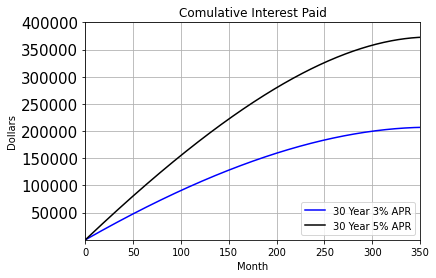

In [140]:
# Recreate the Graph 

# for the legend controls I searched "stack over flow"
plt.plot(new_df['Month'],new_df['Interest Paid'].cumsum(),c='b', label='30 Year 3% APR')
plt.plot(new_df_five['Month'],new_df_five['Interest Paid'].cumsum(),c='k', label ='30 Year 5% APR')

plt.xlim([0,350])
plt.ylim([50,400000])
plt.legend(loc="lower right")
plt.yticks(size =15)
plt.yticks(size =15)
plt.xlabel ('Month')
plt.ylabel ('Dollars')
plt.title ('Comulative Interest Paid')
plt.grid(axis = 'y')
plt.grid(axis = 'x')
plt.show()



In [ ]:
|